# Анализ факторов влияющих на продажи игр

Описание проекта:
- Интернет-магазин планирует рекламные кампании на следующий (2017) год
- Из открытых источников собраны исторические данные о продажах игр
- Необходимо проанализировать данные и выявить закономерности вляющие на успешность игр

## Импорт данных

In [1]:
#импортирую бибилотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
#открываю файл с данными
df = pd.read_csv('/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


___Вывод___: 
- в данных присутствуют пропуски
- в названиях колонок присутствуют заглавные буквы
- дата в неверном формате

## Предобработка данных

In [3]:
#перевожу названия колонок в нижний регистр
df.columns = df.columns.str.lower()

#перевожу колонку с годом в формат целого числа, пропуски заполняю нулем
df['year_of_release'] = df['year_of_release'].fillna(0).astype('int')

#удаляю 2 строки с пропущенным значением имени и жанра
df = df.dropna(subset=['name'], axis=0)

#перевожу колонки с оценками китиков и пользователей в формат чисел с плавающей запятой
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

#добавляю колонку с сумарными продажами по всем регионам
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
print('')

#заполняю заглушкой пропуски в столбце 'rating'
df['rating'] = df['rating'].fillna('unknown')

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16713 non-null object
total_sales        16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


___Вывод___: 
- Названия колонок приведены к нижнему регистру
- Год выпуска приведен к целочисленному формату
- Удалены две строки с незаполненными названиями
- Оценки критиков приведены к числовому формату
- Добавлена колонка с общими продажами
- Столбец 'rating'заполнен заглушкой 'unknown'
- Столбцы с оценками пользователей и критиков оставляем с пропусками, так как если заполнить пропуски средним или медианой это может исказить статистику.

## Анализ данных

### Количество игр в зависимости от года выпуска

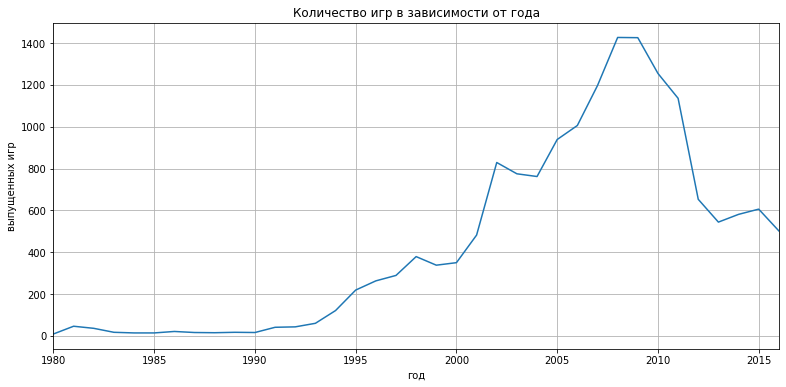

In [4]:
df.groupby('year_of_release')['genre'].count().plot(y='year_of_release', xlim=1980, grid=True, figsize=(13,6))
plt.xlabel('год')
plt.ylabel('выпущенных игр')
plt.title('Количество игр в зависимости от года')
print('')

___Вывод___: После 1993 года началось резкое увличения числа выпускаемых игр, пик был достигнут в 2008-2009 годах, после чего начался резкий спад по количеству выпускаемых игр

Так как в период до 1993 года рынок игр был малоактивным, оставим только данные с 1993 по 2016 года

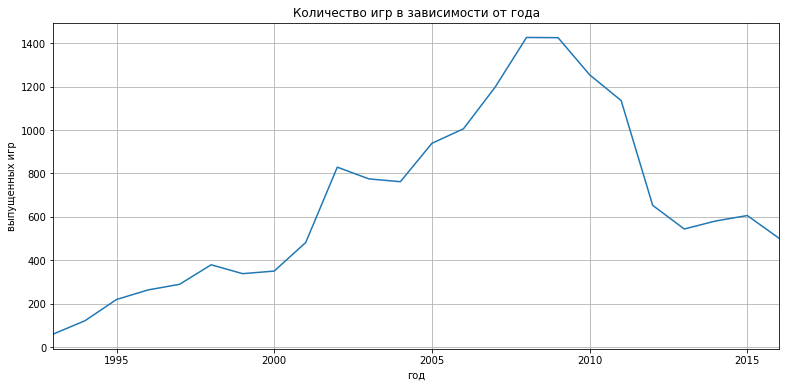

In [5]:
df = df[df['year_of_release'] >= 1993]
df.groupby('year_of_release')['genre'].count().plot(y='year_of_release', grid=True, figsize=(13,6))
plt.xlabel('год')
plt.ylabel('выпущенных игр')
plt.title('Количество игр в зависимости от года')
print('')

### Топ-5 платформ за весь период

Выделим 5 платформ с наибольшими продажами:

Сумарные продажы Топ-5 платформ, млн. копий:


platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
Name: total_sales, dtype: float64

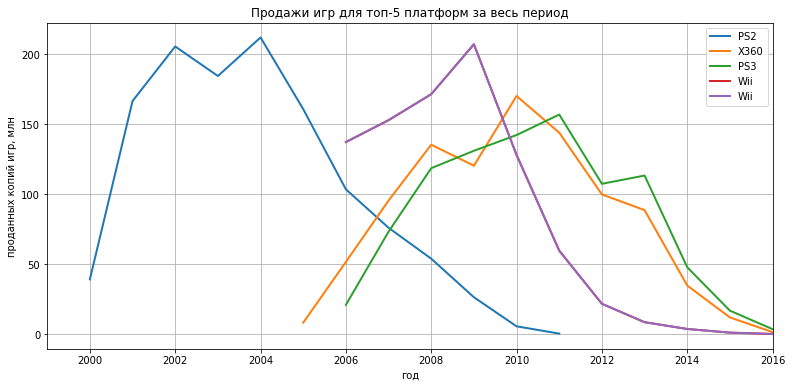

In [6]:
#выделяем топ 5 платформ
print('Сумарные продажы Топ-5 платформ, млн. копий:')
display(df.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).head())

def plot_sales_platform(data, platform):(
    data[data['platform'] == platform]
    .groupby('year_of_release')['total_sales']
    .sum().plot(y='year_of_release', xlim=1999
    , label=platform, legend=True,linewidth = 2
    , grid=True, figsize=(13,6))
)

#строим график по топ-5 платформ
plot_sales_platform(df, 'PS2')
plot_sales_platform(df, 'X360') 
plot_sales_platform(df, 'PS3') 
plot_sales_platform(df, 'Wii') 
plot_sales_platform(df, 'Wii')

plt.xlabel('год')
plt.ylabel('проданных копий игр, млн')
plt.title('Продажи игр для топ-5 платформ за весь период')
print('')

___Вывод___: 
- Средний срок жизни платформы - 10 лет

- Из графика видно что самая популярная платформа PS2 имела активные продажи в период с 2000 по 2010 годы. В середине низходящей линии по продажам PS2(2006 год), появились следующие 4 по популярности платформы. С учетом этого можно предположить что следующие самые популярные платформы должны появиться в 2013 году.
   
   Примем 2013-2016 года за актуальный период.

### Топ-5 платформ за актуальный период

In [7]:
#делаю фрейм с актуальным периодом
df_actual = df.query('year_of_release >= 2013')

print('Сумарные продажы всех платформ за 2013-2016 года, млн. копий:')
df_actual.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False)

Сумарные продажы всех платформ за 2013-2016 года, млн. копий:


platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

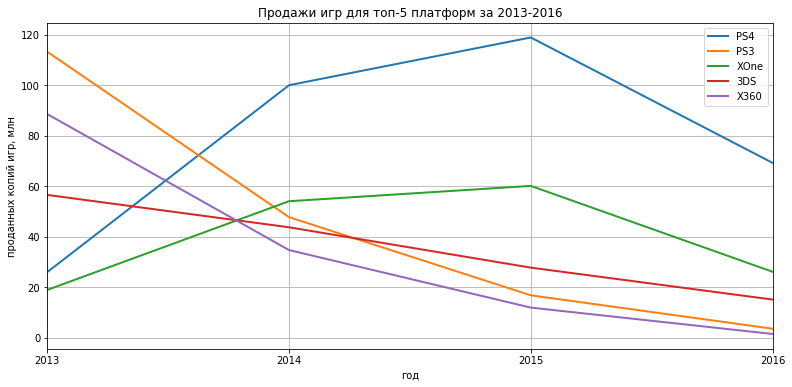

In [8]:
plot_sales_platform(df_actual, 'PS4')
plot_sales_platform(df_actual, 'PS3') 
plot_sales_platform(df_actual, 'XOne') 
plot_sales_platform(df_actual, '3DS') 
plot_sales_platform(df_actual, 'X360') 


plt.xlabel('год')
plt.ylabel('проданных копий игр, млн')
plt.title('Продажи игр для топ-5 платформ за 2013-2016')

plt.xlim(2013,2016)
plt.xticks([2013, 2014, 2015, 2016])
print('')

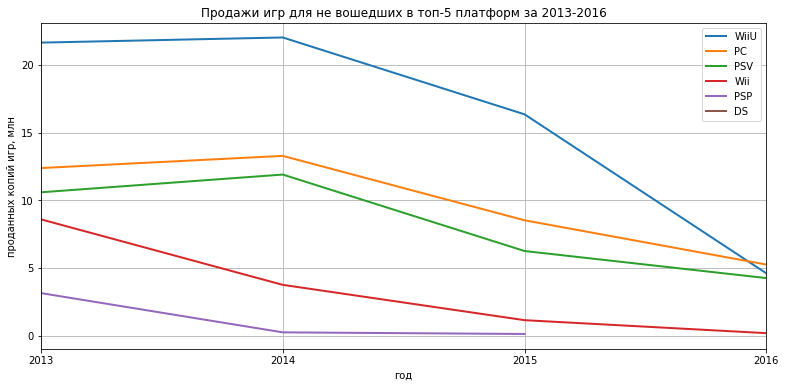

In [9]:
plot_sales_platform(df_actual, 'WiiU')
plot_sales_platform(df_actual, 'PC') 
plot_sales_platform(df_actual, 'PSV') 
plot_sales_platform(df_actual, 'Wii') 
plot_sales_platform(df_actual, 'PSP') 
plot_sales_platform(df_actual, 'DS') 

plt.xlabel('год')
plt.ylabel('проданных копий игр, млн')
plt.title('Продажи игр для не вошедших в топ-5 платформ за 2013-2016')

plt.xlim(2013,2016)
plt.xticks([2013, 2014, 2015, 2016])
print('')

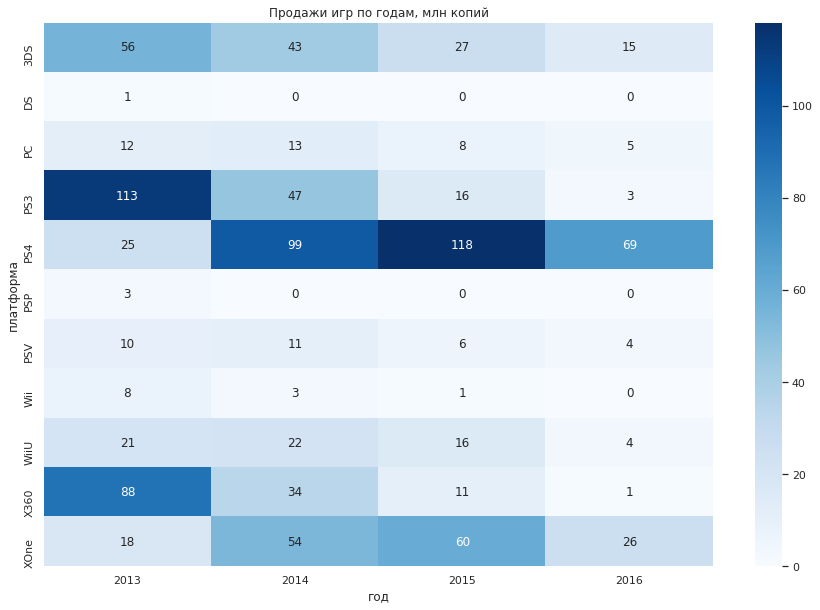

In [10]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(df_actual.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum').fillna(0).astype('int'), annot=True, fmt="d", cmap="Blues")
plt.xlabel('год')
plt.ylabel('платформа')
plt.title('Продажи игр по годам, млн копий')
print('')

Вывод: Если предположить что данные за последний (2016 год) не полные, то восходящий тренд по продажам имют только две платформы - PS4 и Xbox One

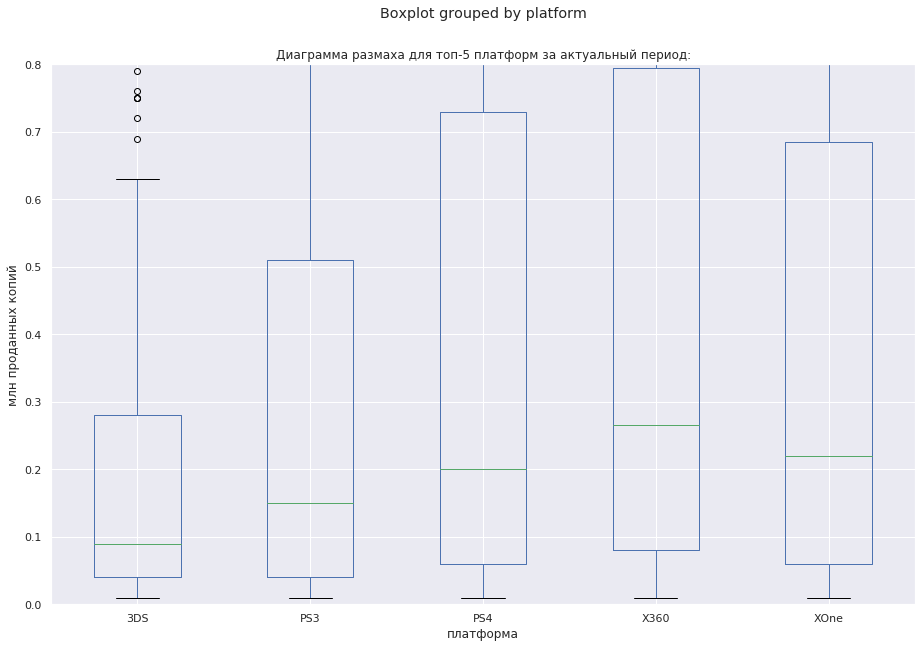

In [11]:
#строю диаграммы распределения для каждой платформы за акуальный период
print('')
#df_actual.boxplot(column='total_sales', by='platform')

#диаграмма размаха для топ-5 платформ
df_actual.query('platform in ["PS4", "PS3", "XOne", "3DS", "X360"]').boxplot(column='total_sales', by='platform')
plt.ylim(0,0.8)

plt.xlabel('платформа')
plt.ylabel('млн проданных копий')
plt.title('Диаграмма размаха для топ-5 платформ за актуальный период:')
print('')


#функция для построение диаграм размаха со значение 'y' примерно равному усу
def boxplot_drow(platform):
    q1 = df_actual[df_actual['platform'] == platform]['total_sales'].quantile(0.25)
    q3 = df_actual[df_actual['platform'] == platform]['total_sales'].quantile(0.75)
    iqr = q3 - q1  
    df_actual[df_actual['platform'] == platform].boxplot(column='total_sales', by='platform')
    plt.ylim(0, iqr*3)

#отдельные ящики диаграммы размаха для топ-5 платформ
#boxplot_drow('PS4') 
#boxplot_drow('PS3')
#boxplot_drow('XOne') 
#boxplot_drow('3DS')
#boxplot_drow('X360') 


Вывод: 

Из диаграм размаха для топ-5 платформ видно:
- Для платформы 3DS игры продаются самыми маленькими тиражами относительно других платформ, разброс по объемам продаж конкретных игр также минимальный относительно других платформ из топ-5
- На платформе X360 чаще всего, относительно других платформ, продаются игры большими тиражами, также вероятно на этой платформе выпущено больше всего хитовых игр
- Две актуальные платформы(имеющие восходящий тренд по продажам) имеют примерно равные продажи игр, различие заключается в том что для PS4 чаще выходят хитовые игры, а для XOne игры в среднем продаються немного большими тиражами чем для PS4

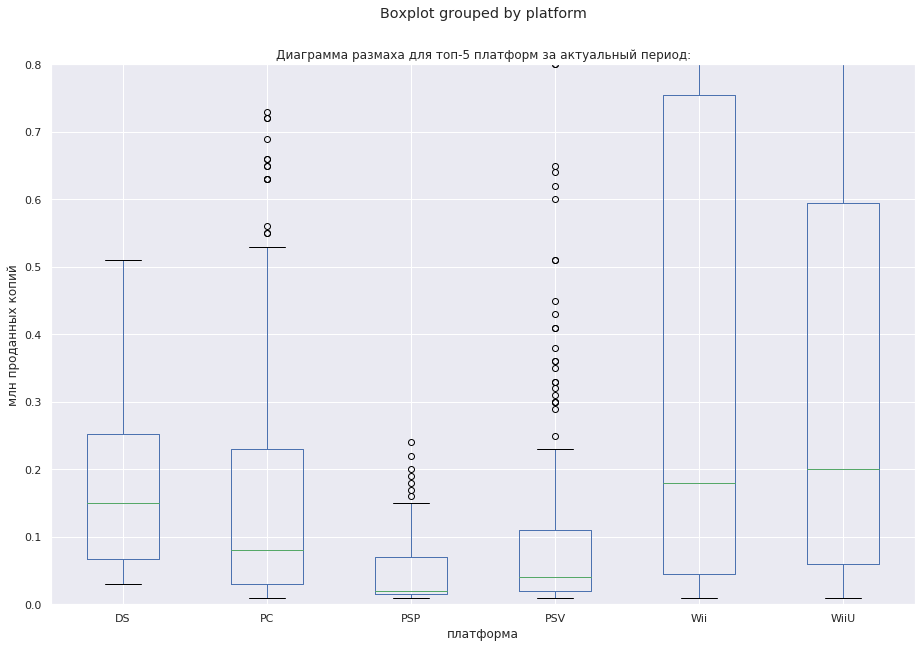

In [12]:
#диаграмма размаха для топ-5 платформ
df_actual.query('platform not in ["PS4", "PS3", "XOne", "3DS", "X360"]').boxplot(column='total_sales', by='platform')
plt.ylim(0,0.8)

plt.xlabel('платформа')
plt.ylabel('млн проданных копий')
plt.title('Диаграмма размаха для топ-5 платформ за актуальный период:')
print('')

Вывод: 

Из диаграм размаха для не вошедших в топ-5 платформ видно:
- Для платформы PSP игры продаются самыми маленькими тиражами относительно других платформ, разброс по объемам продаж конкретных игр также минимальный относительно других платформ из не вошедших в топ-5
- Вероятно на платформе Wii выпущено больше всего хитовых игр
- Для WiiU игры в среднем продаются наиольшими тиражами из всех плаформ не вошедших в топ-5

<div class="alert alert-danger">
<b>Комментарии ревьюера 🛑:</b> <s>К сожалению, на этом графике видны только выбросы, и совсем не видны медиана и 75% квантиль. Для более обоснованных выводов нужно сделать дополнительный график, где будет отображена только нижняя часть boxplot-ов. Также будет удобнее вывести боксплоты только для актуальных платформ </s>

 Отлично, теперь все визуализации наглядные
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Добавил отдельно боксплоты для платформ из топ-5 и всех отстальных. Также попробовал сделаь боксплоты для каждой платформы на отдельном графике, но получается не наглядно, сложно сравнивать с другими платформами, поэтому убрал эти графики</div>

### Зависимость продаж от оценок

#### Зависимость продаж игр от оценок для PS4

In [13]:
#создаю функцию для построения графиков и корреляций мжду плаформой и оценками
def plot_score(platform):
    df_actual[df_actual['platform'] == platform].plot(
        kind='scatter', y='total_sales', x='critic_score', alpha=0.5, figsize=(13,3), ylim=(0,5))
    plt.xlabel('Оценка критиков')
    plt.ylabel('проданных копий игр, млн')
    t1 = 'Зависимость продаж от оценок критиков. Для ' + platform + ':'
    plt.title(t1)
    print('Корреляция между продажами и оценками критиков. Для', platform, ':' 
          , df_actual[df_actual['platform'] == platform]['total_sales'].corr(df_actual['critic_score']))
    
    df_actual[df_actual['platform'] == platform].plot(
        kind='scatter', y='total_sales', x='user_score', alpha=0.5, figsize=(13,3), ylim=(0,5))
    plt.xlabel('Оценка пользователей')
    plt.ylabel('проданных копий игр, млн')
    t2 = 'Зависимость продаж от оценок пользователей. Для ' + platform + ':'
    plt.title(t2)
    print('Корреляция между продажами и оценками пользователей. Для', platform, ':' 
          , df_actual.query('platform == "PS4"')['total_sales'].corr(df_actual['user_score']))  

Корреляция между продажами и оценками критиков. Для PS4 : 0.406567902061781
Корреляция между продажами и оценками пользователей. Для PS4 : -0.031957110204556424


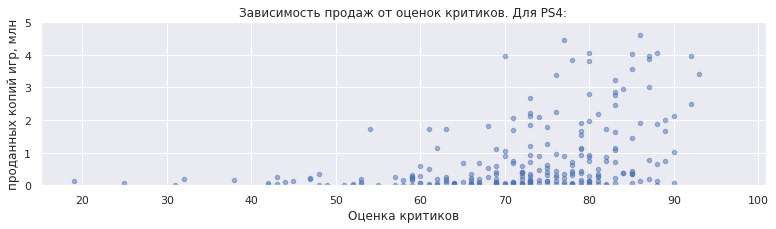

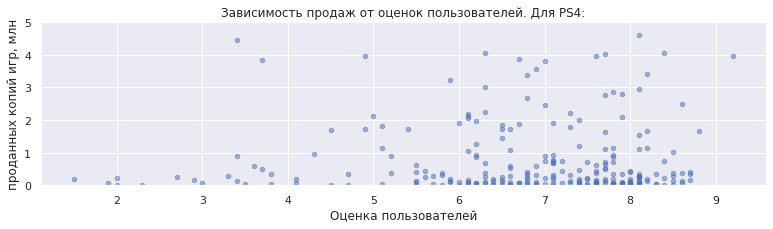

In [14]:
plot_score('PS4') 

#### Зависимость продаж игр от оценок для PS3

Корреляция между продажами и оценками критиков. Для PS3 : 0.3342853393371919
Корреляция между продажами и оценками пользователей. Для PS3 : -0.031957110204556424


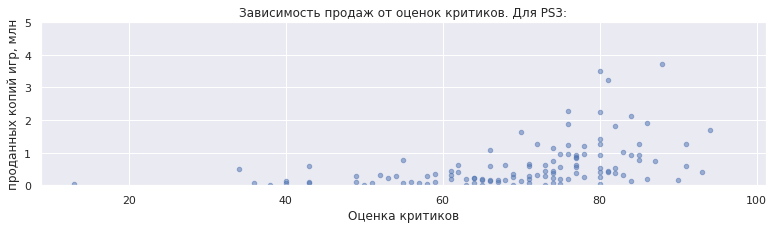

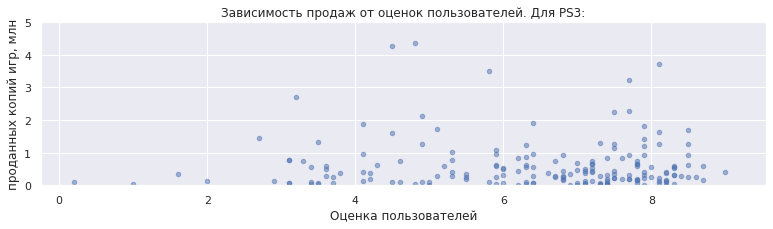

In [15]:
plot_score('PS3') 

#### Зависимость продаж игр от оценок для XOne

Корреляция между продажами и оценками критиков. Для XOne : 0.41699832800840175
Корреляция между продажами и оценками пользователей. Для XOne : -0.031957110204556424


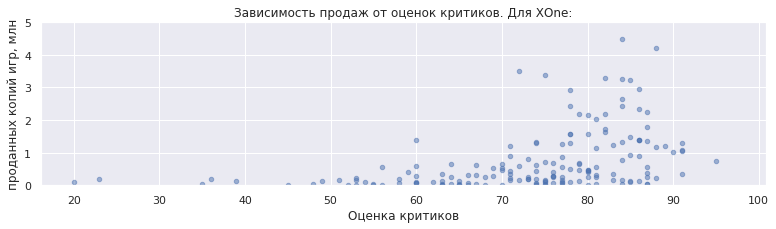

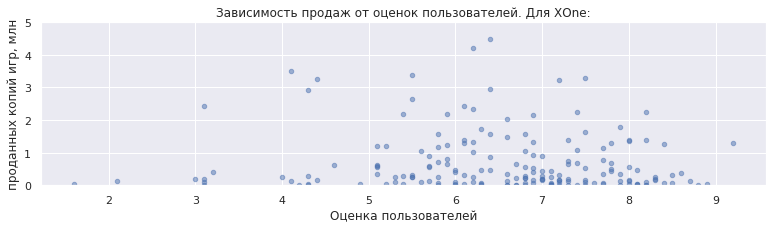

In [16]:
plot_score('XOne') 

#### Зависимость продаж игр от оценок для 3DS

Корреляция между продажами и оценками критиков. Для 3DS : 0.35705661422881035
Корреляция между продажами и оценками пользователей. Для 3DS : -0.031957110204556424


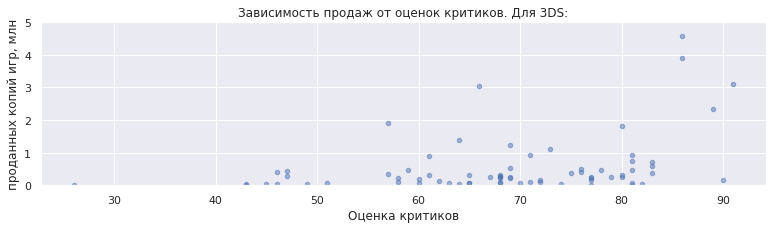

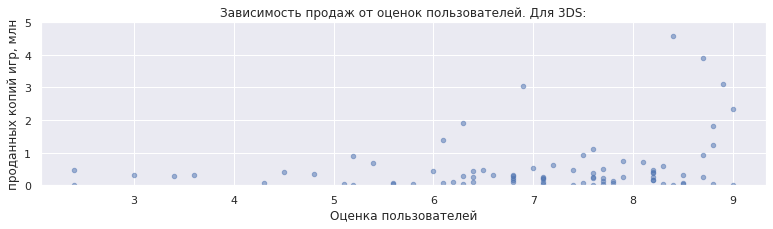

In [17]:
plot_score('3DS') 

#### Зависимость продаж игр от оценок для X360

Корреляция между продажами и оценками критиков. Для X360 : 0.3503445460228664
Корреляция между продажами и оценками пользователей. Для X360 : -0.031957110204556424


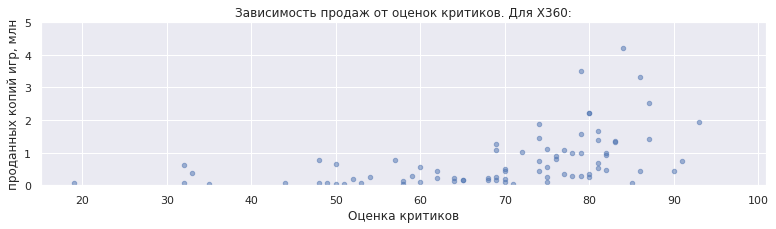

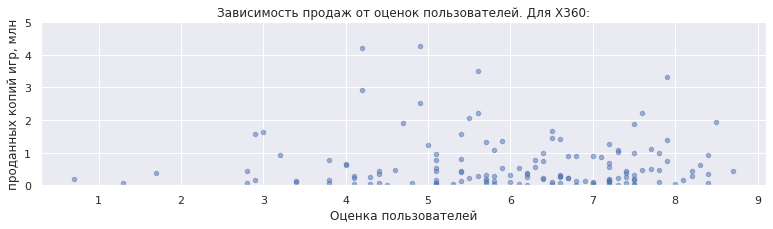

In [18]:
plot_score('X360') 

Вывод: 
- Оценки критиков на продажи игр влияют значительно. Связь прямая. 
- Оценки пользоватлей на продажи не влияют

<div class="alert alert-danger">
<b>Комментарии ревьюера 🛑:</b> <s>В задании есть пункт "соотнесите выводы с продажами игр на других платформах." Выводы, сделанные на основе расчетов по нескольким платформам выглядят весомей и убедительней.

Еще, один момент - корреляцию -0.0026 стоит интерпретировать как отсутствие взаимосвязи.  </s></div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Скорректировал</div>

<div class="alert alert-success">
<b>Комментарии ревьюера V2💚:</b> Здесь мы еще должны отметить, что в данном случае корреляция может и не иметь предсказательнйо силы. Мы не знаем, как были собраны данные - критики могли выставить свои оценки после коммерческого успеха игры</div>

### Зависимость продаж от жанра

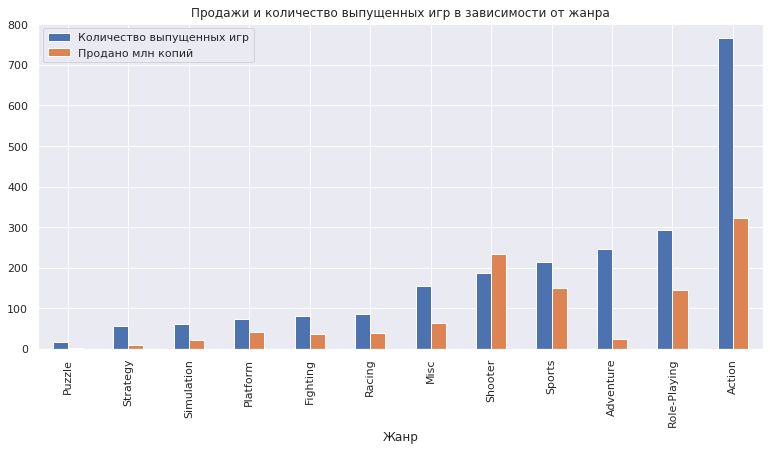

In [19]:
genre_sales = pd.pivot_table(df_actual, index = 'genre', values='total_sales', aggfunc=['count', 'sum'])
genre_sales.columns = ['Количество выпущенных игр', 'Продано млн копий']
genre_sales.sort_values(by='Количество выпущенных игр').plot(kind="bar", grid=True, figsize=(13,6), legend=True)

plt.xlabel('Жанр')
plt.title('Продажи и количество выпущенных игр в зависимости от жанра')
print('')

Вывод: Жанр с самым перспективным соотношением споса и предложения это 'Shooter' - по конкуренции этот жанр на 5 месте, а по продажам на втором. Самый популярный 'Action'

<div class="alert alert-success">
<b>Комментарии ревьюера 💚:</b> Молодец, что рассмотрел и суммарные продажи и количество продаж. </div>

## Портрет пользователя по регионам продаж

### Европа

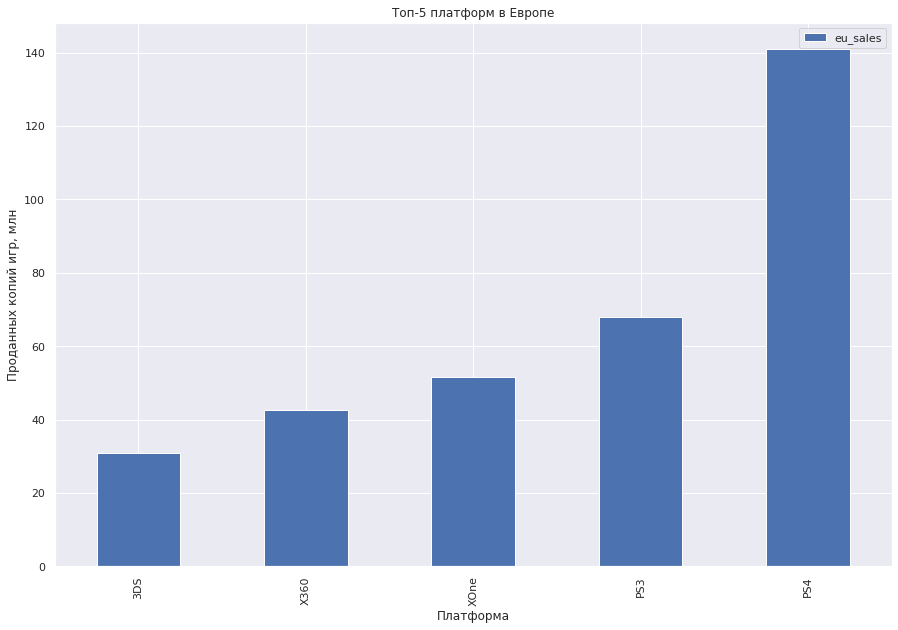

In [20]:
pd.pivot_table(df_actual, index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head().sort_values(by='eu_sales').plot(kind='bar', grid=True)

plt.xlabel('Платформа')
plt.ylabel('Проданных копий игр, млн')
plt.title('Топ-5 платформ в Европе')
print('')

Вывод: С больши отрывом лидирует PS4

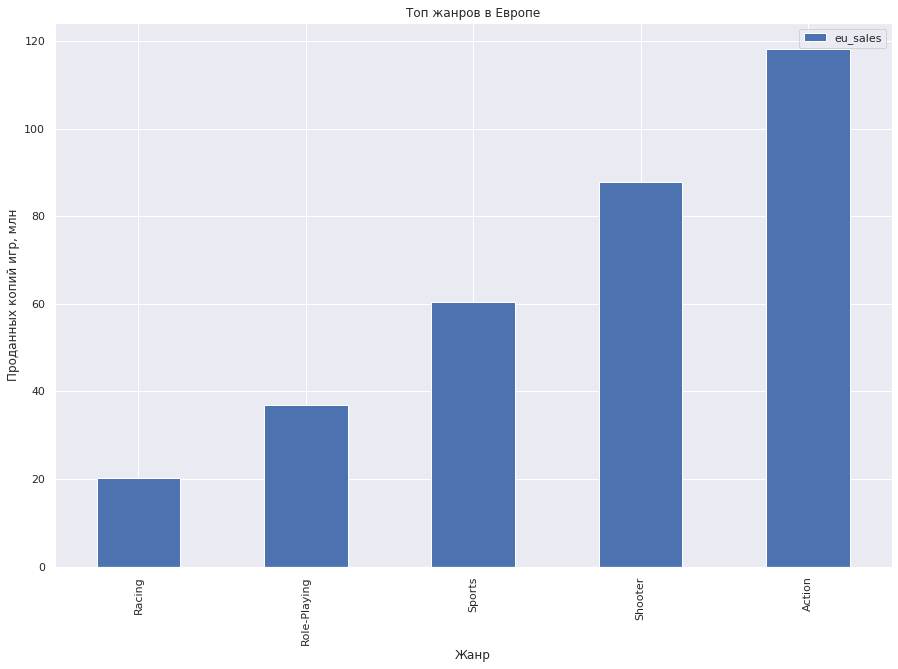

In [21]:
pd.pivot_table(df_actual, index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head().sort_values(by='eu_sales').plot(kind='bar', grid=True)

plt.xlabel('Жанр')
plt.ylabel('Проданных копий игр, млн')
plt.title('Топ жанров в Европе')
print('')

Вывод: Cамый популярный жанр Action

In [22]:
df_actual['rating'].unique()

array(['M', 'unknown', 'E', 'T', 'E10+'], dtype=object)

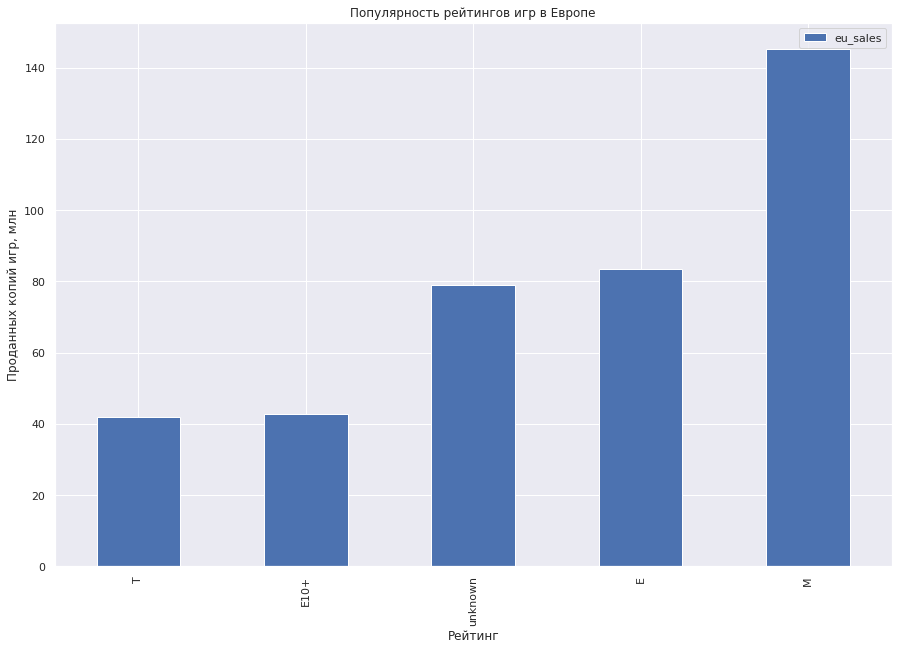

In [23]:
pd.pivot_table(df_actual, index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales').plot(kind='bar', grid=True)

plt.xlabel('Рейтинг')
plt.ylabel('Проданных копий игр, млн')
plt.title('Популярность рейтингов игр в Европе')
print('')

Вывод: Игры с рейтингом "М" продаються чаще других с большим отрывом

### Северная Америка

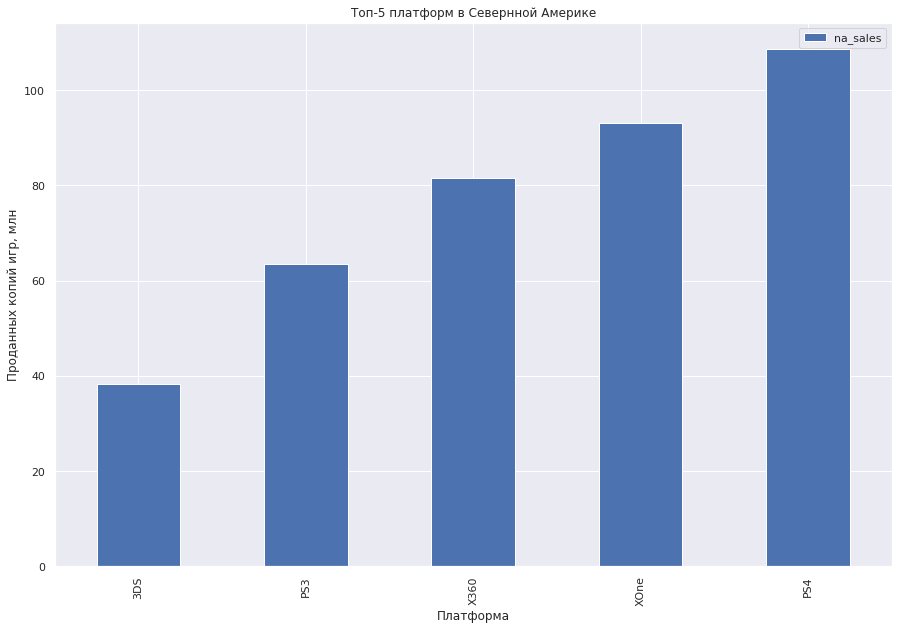

In [33]:
pd.pivot_table(df_actual, index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head().sort_values(by='na_sales').plot(kind='bar', grid=True)

plt.xlabel('Платформа')
plt.ylabel('Проданных копий игр, млн')
plt.title('Топ-5 платформ в Севернной Америке')
print('')

Вывод: Лидирует PS4, но с гораздо меньшим отрывом чем в Европе.

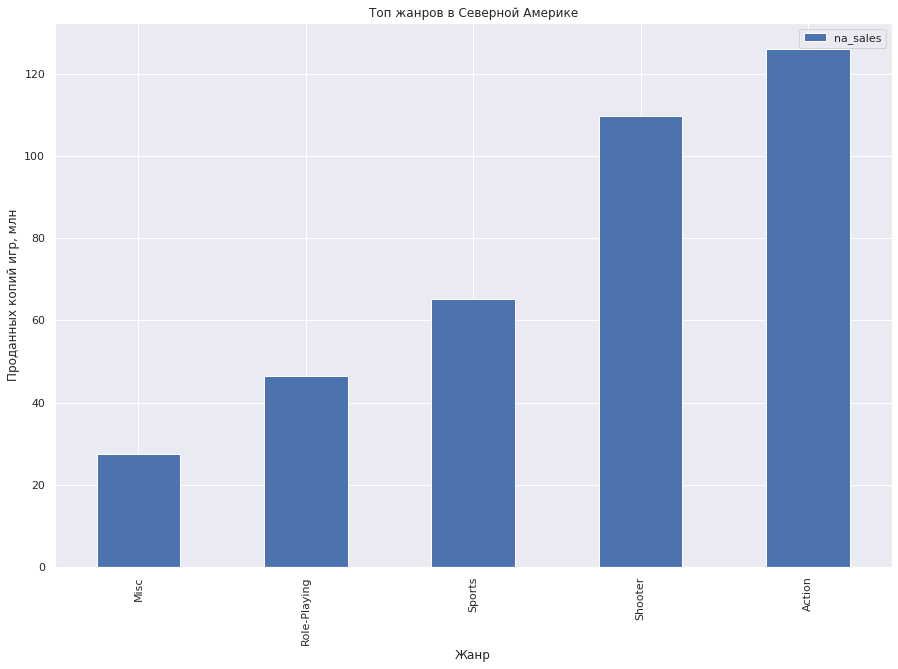

In [25]:
pd.pivot_table(df_actual, index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head().sort_values(by='na_sales').plot(kind='bar', grid=True)

plt.xlabel('Жанр')
plt.ylabel('Проданных копий игр, млн')
plt.title('Топ жанров в Северной Америке')
print('')

Вывод: Расределение по популрным жанрам аналогично Европе за исключением того что в Северной Америке на 5 месте по популярности стоит жанр "Misc"

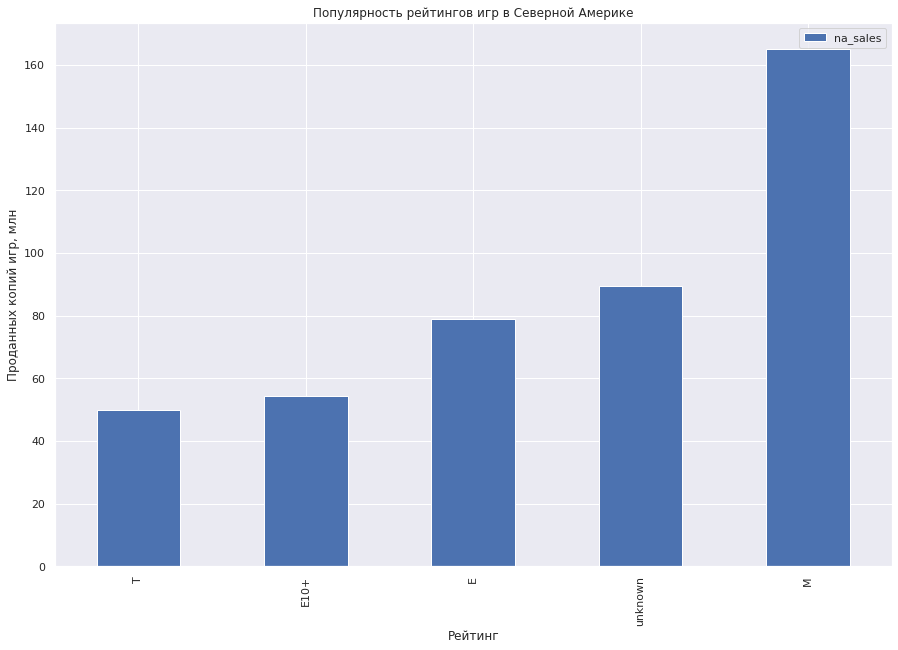

In [26]:
pd.pivot_table(df_actual, index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales').plot(kind='bar', grid=True)

plt.xlabel('Рейтинг')
plt.ylabel('Проданных копий игр, млн')
plt.title('Популярность рейтингов игр в Северной Америке')
print('')

Вывод: Распределение аналогично Европе

### Япония

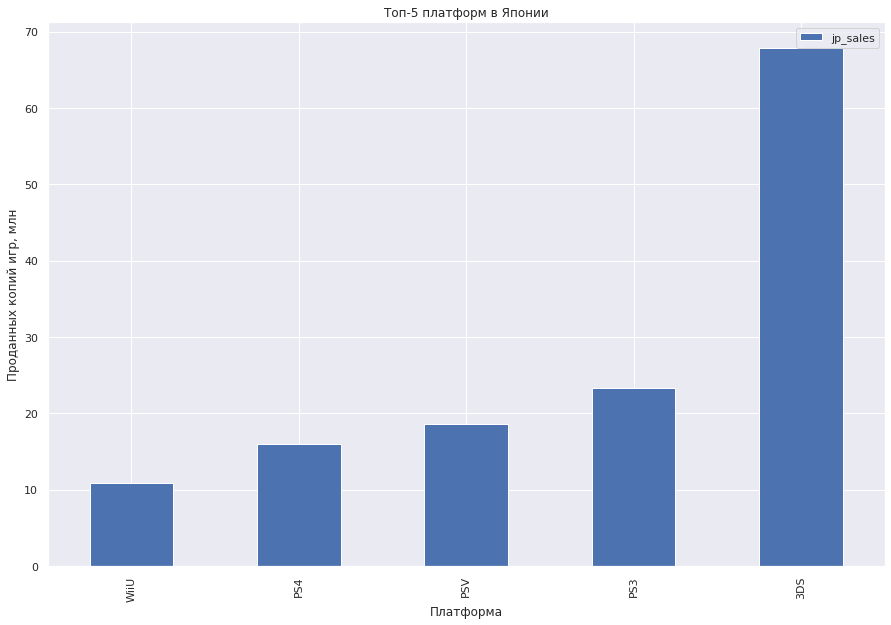

In [27]:
pd.pivot_table(df_actual, index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head().sort_values(by='jp_sales').plot(kind='bar', grid=True)

plt.xlabel('Платформа')
plt.ylabel('Проданных копий игр, млн')
plt.title('Топ-5 платформ в Японии')
print('')

Вывод: Лидирует 3DS с огромным отрывом, следующие три места занимают платформы PlayStation разных версий

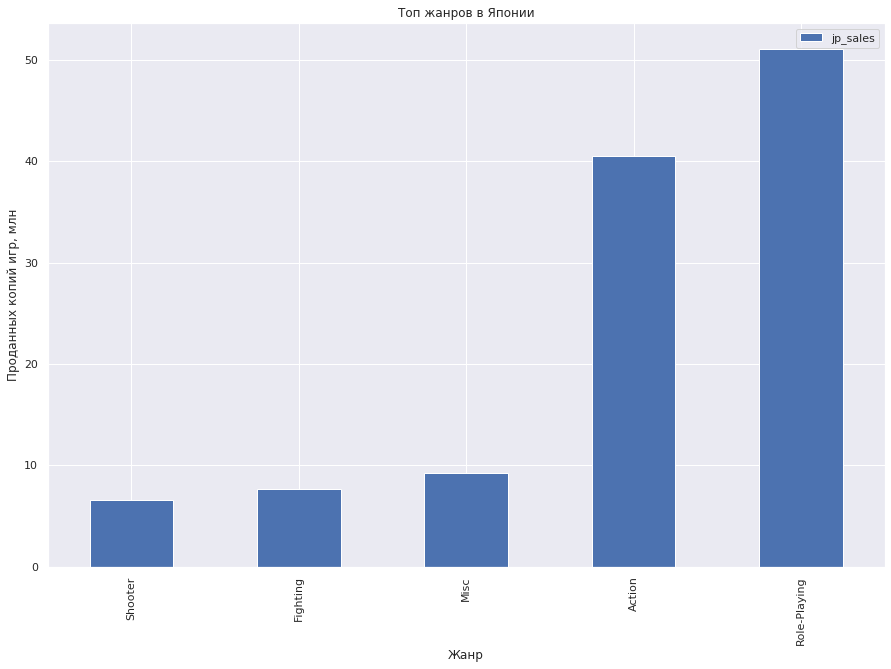

In [28]:
pd.pivot_table(df_actual, index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head().sort_values(by='jp_sales').plot(kind='bar', grid=True)

plt.xlabel('Жанр')
plt.ylabel('Проданных копий игр, млн')
plt.title('Топ жанров в Японии')
print('')

Вывод: На первом месте по популярности жанр 'Role-Playing', на втором 'Action'. Первые две строчки лидируют с огромным отрывом

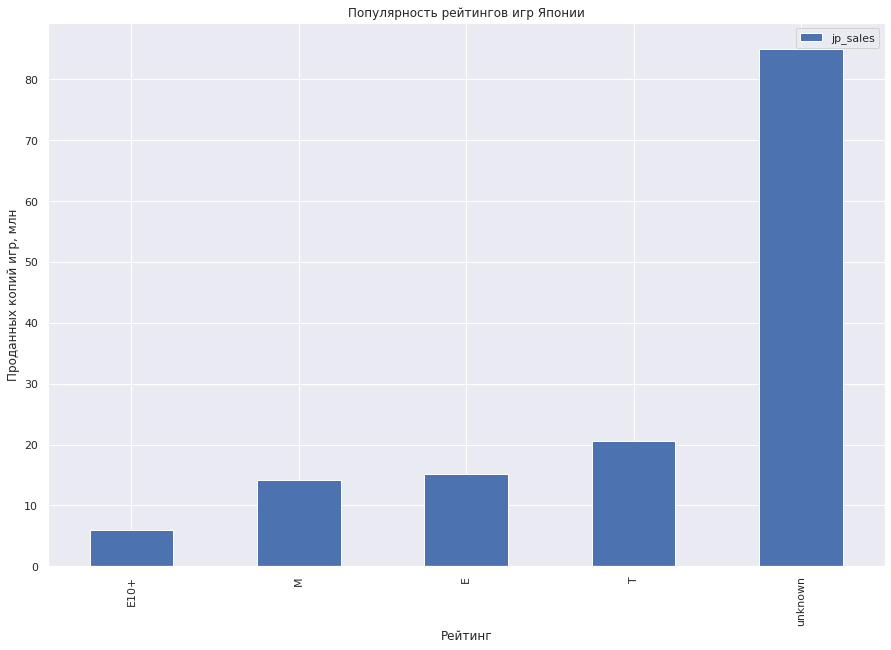

In [29]:
pd.pivot_table(df_actual, index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales').plot(kind='bar', grid=True)

plt.xlabel('Рейтинг')
plt.ylabel('Проданных копий игр, млн')
plt.title('Популярность рейтингов игр Японии')
print('')

Вывод: Самые продоваемые игры в Японии с неопределенным рейтингм

<div class="alert alert-danger">
<b>Комментарии ревьюера 🛑:</b> <s>Когда заполнишь пропуски в столбце рейтинг, выводы по Японии померяются, их нужно будет обновить.</s> </div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Скорректировал</div>

<div class="alert alert-success">
<b>Комментарии ревьюера V2 💚:</b> Верно, в Японии популярны игры, которым был не присвоен международный рейтинг, возможно это игры для локального рынка</div>

## Проверка гипотез

Удаляем выбросы:

In [30]:
#удаляю выбросы
def del_outlier(row, column):
    row[column].count()
    q1 = row[column].quantile(0.25)
    q3 = row[column].quantile(0.75)
    iqr = q3-q1
    print()
    print('Нижняя граница выбросов для',column,':',  q1 - 1.5*(q3-q1), 
          'Сейчас минимум:',row[column].min())
    print('Верхняя граница выбросов для',column,':', q3 + 1.5*(q3-q1), 
          'Сейчас максимум:',row[column].max())
    outlier_before = row[column].count()
    row = row[row[column] >= (q1-1.5*iqr)]
    row = row[row[column] <= (q3+1.5*iqr)]
    outlier_after = row[column].count() 
    print('Удалено выбросов:', outlier_before-outlier_after, 'Значений до:',  outlier_before, 'Значений после:', outlier_after)
    return row

filterd_df_actual = del_outlier(df_actual, 'na_sales')
filterd_df_actual = del_outlier(filterd_df_actual, 'eu_sales')
filterd_df_actual = del_outlier(filterd_df_actual, 'jp_sales')
filterd_df_actual = del_outlier(filterd_df_actual, 'other_sales')





Нижняя граница выбросов для na_sales : -0.22499999999999998 Сейчас минимум: 0.0
Верхняя граница выбросов для na_sales : 0.375 Сейчас максимум: 9.66
Удалено выбросов: 292 Значений до: 2233 Значений после: 1941

Нижняя граница выбросов для eu_sales : -0.12 Сейчас минимум: 0.0
Верхняя граница выбросов для eu_sales : 0.2 Сейчас максимум: 1.38
Удалено выбросов: 176 Значений до: 1941 Значений после: 1765

Нижняя граница выбросов для jp_sales : -0.07500000000000001 Сейчас минимум: 0.0
Верхняя граница выбросов для jp_sales : 0.125 Сейчас максимум: 3.44
Удалено выбросов: 160 Значений до: 1765 Значений после: 1605

Нижняя граница выбросов для other_sales : -0.015 Сейчас минимум: 0.0
Верхняя граница выбросов для other_sales : 0.025 Сейчас максимум: 0.15
Удалено выбросов: 218 Значений до: 1605 Значений после: 1387


<div class="alert alert-success">
<b>Комментарии ревьюера 💚:</b> Удаление выбросов это отличная идея</div>

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулева я гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Альтернативная гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC отличаются"

<div class="alert alert-success">
<b>Комментарии ревьюера 💚:</b> Гипотезы верные, отлично :)</div>

In [31]:
temp = filterd_df_actual.query('platform == "XOne" or platform == "PC"').pivot_table(index='platform', values='user_score', aggfunc = 'mean')
temp.columns = ['Средняя оценка пользователей']
display(temp)

sample_xbox = filterd_df_actual[filterd_df_actual['platform'] == 'XOne']['user_score'].dropna()
sample_pc = filterd_df_actual[filterd_df_actual['platform'] == 'PC']['user_score'].dropna()

alpha = 0.05
results = st.ttest_ind(sample_xbox, sample_pc, equal_var = True)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

,Средняя оценка пользователей
platform,
PC,6.323333
XOne,6.522222


p-значение:  0.38964517540505006
Не отвергаем нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports разные

Нулева я гипотеза "Средние пользовательские рейтинги жанров Action и Sports одинаковые"

Альтернативная гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные"

<div class="alert alert-success">
<b>Комментарии ревьюера 💚:</b> Здесь гипотезы также сформулированы верно</div>

In [32]:
temp = filterd_df_actual.query('genre == "Action" or genre == "Sports"').pivot_table(index='genre', values='user_score', aggfunc = 'mean')
temp.columns = ['Средняя оценка пользователей']
display(temp)

sample_action = filterd_df_actual[filterd_df_actual['genre'] == 'Action']['user_score'].dropna()
sample_sports = filterd_df_actual[filterd_df_actual['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.05
results = st.ttest_ind(sample_action, sample_sports, equal_var = True)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

,Средняя оценка пользователей
genre,
Action,6.787864
Sports,5.092593


p-значение:  4.399723032237492e-12
Отвергаем нулевую гипотезу


<div class="alert alert-success">
<b>Комментарии ревьюера 💚:</b> Тестирование проведено корректно. Молодец. Отлично, что ты вывел и p-value и сравниваемые показатели</div>

## Общий вывод

- Интересы пользователей Европы и Северной Америке схожы. 
- Интересы пользователей из Японии сильно отличаются от интересов пользоватеей Европы и Северной Америке.
- Оценка критиков ощутимо влияет на продажи
- Оценка пользователей почти не влияет на продажи
- Средние пользовательские рейтинги платформ Xbox One и PC, вероятно, одинаковые
- Средние пользовательские рейтинги жанров Action и Sports, вероятно, разные
- Для Европы и Северной Америке перспективней всего продвигать игры в жанре 'Shooter' и 'Action', на платформе 'PS4', с рейтингом 'M'. С учетом жизни платформ в 10 лет, игры будут приносить продажи примерно до 2023 года.
- Для Японии перспективней всего продвигать игру в жанре 'Role-Playing', на платформе '3DS'.



<div class="alert alert-success">
<b>Комментарии ревьюера 💚:</b> Здорово, что есть общие выводы по проекту. После всех правок обнови их при необходимости.</div>

<div class="alert alert-success">
<b>Комментарии ревьюера 💚:</b> Александр, ты выполнил большую часть проекта. Есть несколько замечаний, но я уверена, ты их быстро поправишь.

1) заполни пропуски в столбце рейтинг

2) поправь график с боксплотами

3) дополни пункт с расчетом корреляций

4) поправь пункт с Портретом пользователя

Если будут какие-то вопросы по моим комментариям - обязательно пиши :) Буду ждать исправленный вариант. </div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Скорректировал все 4 пункта </div>

<div class="alert alert-success">
<b>Комментарии ревьюера V2💚:</b>  Александр, замечаний больше нет. Проект принят. Удачи в следующих проектах!</div>